### <font color='red'> Buzz Prediction on Twitter (Classification Part I)

Objective of this notebook:
- Applied the below classification tasks to the data:
    - KNN Classifier
    - Logistic Regression
    - Linear Support Vector Machine
    - Kernelized Support Vector Machine
    - Decision Tree
- Justified about the good evaluation startegy for this datatset.
- Used Grid Search in case the model has scaling parameter(s) to find the best scaling paramter.
- Used cross-validation to find the average training and testing score.
- Compared the results from above models and came out with the best classifier for this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Twitter-Absolute-Sigma-500.data', header=None)

In [3]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']

In [4]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [5]:
data.shape

(140707, 78)

In [6]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from  sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

### Explore the dataset

In [8]:
y.sum()/y.count()

0.19739600730596205

Class Distribution: 
   -- Positives instances (ie. Buzz) : 27775 (19 %)
   -- Negative instances (ie. Non Buzz) : 112932 (81 %)

It can be clearly seen that this is an imbalanced dataset. Here we have to minimize both Type I and Type II errors, so we have used F1 Score as the evaluation metrics for this classification task.

Also as the data points in the dataset is not normally distributed (plots in the regression task notebook). Hence we have used MinMax Scaler.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### 1. KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='f1')
grid_knn.fit(X_train, y_train)
grid_knn.score(X_train, y_train)

0.90466633216256898

In [12]:
grid_knn.score(X_test, y_test)

0.90035842293906809

In [13]:
grid_knn.best_params_

{'n_neighbors': 10}

In [14]:
grid_knn.cv_results_['mean_test_score']

array([ 0.86256077,  0.88670427,  0.89029141,  0.88696809,  0.88422827])

In [15]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [16]:
print('Train F1 Score: %.4f'%f1_score(y_knn_train_predict, y_train))
print('Test F1 Score: %.4f '%f1_score(y_knn_predict, y_test))

Train F1 Score: 0.9047
Test F1 Score: 0.9004 


In [17]:
cv_results = pd.DataFrame.from_dict(grid_knn.cv_results_)
cv_results[['param_n_neighbors','mean_train_score','mean_test_score']]

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.862561
1,5,0.921845,0.886704
2,10,0.904355,0.890291
3,15,0.900578,0.886968
4,20,0.895504,0.884228


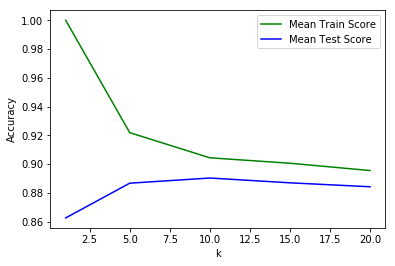

In [18]:
x_axis = cv_results['param_n_neighbors']
%matplotlib inline
plt.plot(x_axis, cv_results['mean_train_score'], label = 'Mean Train Score', c = 'g')
plt.plot(x_axis, cv_results['mean_test_score'], label = 'Mean Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [68]:
report_table = [['knn', 'k = 10', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), f1_score(y_knn_train_predict, y_train), f1_score(y_knn_predict, y_test) ]]

### 2. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

logis_reg = LogisticRegression()

grid_log = GridSearchCV(logis_reg, param_grid = param_grid, cv = 5, scoring='f1')
grid_log.fit(X_train, y_train)
grid_log.score(X_train, y_train)

0.90486891385767787

In [22]:
grid_log.score(X_test, y_test)

0.91220556745182013

In [23]:
grid_log.best_params_

{'C': 10, 'penalty': 'l1'}

In [24]:
grid_log.cv_results_['mean_test_score']

array([ 0.        ,  0.24741075,  0.79495326,  0.706322  ,  0.89607181,
        0.86137006,  0.90108457,  0.89267068,  0.89870943,  0.90077301,
        0.89928198,  0.89890953])

In [25]:
y_log_predict = grid_log.predict(X_test)
y_log_train_predict = grid_log.predict(X_train)

In [26]:
print('Train F1 Score: %.4f'%f1_score(y_log_train_predict, y_train))
print('Test F1 Score: %.4f '%f1_score(y_log_predict, y_test))

Train F1 Score: 0.9049
Test F1 Score: 0.9122 


In [27]:
cv_results = pd.DataFrame.from_dict(grid_log.cv_results_)
cv_results[['param_C','param_penalty','mean_train_score','mean_test_score']]

,param_C,param_penalty,mean_train_score,mean_test_score
0,0.01,l1,0.000000,0.000000
1,0.01,l2,0.248494,0.247411
2,0.1,l1,0.796651,0.794953
3,0.1,l2,0.706193,0.706322
4,1,l1,0.898271,0.896072
5,1,l2,0.862953,0.861370
6,10,l1,0.904886,0.901085
7,10,l2,0.894919,0.892671
8,100,l1,0.907332,0.898709
9,100,l2,0.904620,0.900773


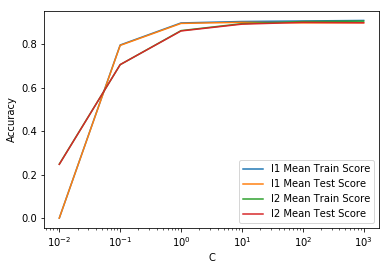

In [28]:
x_axis = param_grid['C']
l1_train = cv_results[cv_results['param_penalty']=='l1']['mean_train_score']
l1_test = cv_results[cv_results['param_penalty']=='l1']['mean_test_score']
l2_train = cv_results[cv_results['param_penalty']=='l2']['mean_train_score']
l2_test = cv_results[cv_results['param_penalty']=='l2']['mean_test_score']
%matplotlib inline
plt.plot(x_axis, l1_train , label = 'l1 Mean Train Score')
plt.plot(x_axis, l1_test , label = 'l1 Mean Test Score')
plt.plot(x_axis, l2_train , label = 'l2 Mean Train Score')
plt.plot(x_axis, l2_test , label = 'l2 Mean Test Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.xscale('log')

In [69]:
report_table = report_table + [['Logistic', 'C = 10, penalty = l1', grid_log.score(X_train, y_train), grid_log.score(X_test, y_test), f1_score(y_log_train_predict, y_train), f1_score(y_log_predict, y_test) ]]

### 3. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6]}
dtree = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='f1', return_train_score=True)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [36]:
grid_tree.best_params_

{'max_depth': 3}

In [37]:
y_dtree_predict_train = grid_tree.predict(X_train)
y_dtree_predict = grid_tree.predict(X_test)

In [70]:
report_table = report_table + [['Decision Tree', 'max_depth = 3', grid_tree.score(X_train, y_train), grid_tree.score(X_test, y_test), f1_score(y_dtree_predict_train, y_train), f1_score(y_dtree_predict, y_test)]]

### 4. Linear SVM

In [50]:
from sklearn.svm import SVC, LinearSVC

svc_linear = SVC(kernel = 'linear') 
param_grid = {'C':[0.01, 0.1, 1, 10]}
print("Parameter grid for Linear SVC: {}".format(param_grid))

grid_svcLinear = GridSearchCV(svc_linear, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='f1')

Parameter grid for Linear SVC: {'C': [0.01, 0.1, 1, 10]}


In [51]:
grid_svcLinear.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [52]:
cv_results = pd.DataFrame.from_dict(grid_svcLinear.cv_results_)
cv_results[['param_C','mean_train_score','mean_test_score']]

,param_C,mean_train_score,mean_test_score
0,0.01,0.500347,0.501454
1,0.1,0.819091,0.817286
2,1,0.887834,0.884673
3,10,0.904613,0.901364


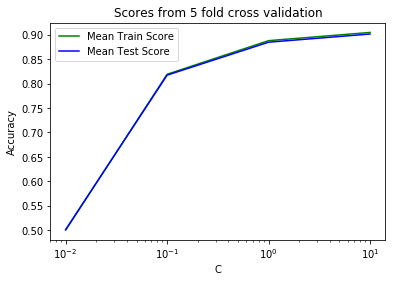

In [53]:
x_axis = cv_results['param_C']
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Scores from 5 fold cross validation')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [54]:
print("Best cross-validation score: {:.4f}".format(grid_svcLinear.best_score_))
print('Best penalty term:',grid_svcLinear.best_params_)
print("Training Score: {:.4f}".format(grid_svcLinear.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_svcLinear.score(X_test, y_test)))

Best cross-validation score: 0.9014
Best penalty term: {'C': 10}
Training Score: 0.9060
Testing Score: 0.9131


In [55]:
y_svcLinear_predict_train = grid_svcLinear.predict(X_train)
y_svcLinear_predict = grid_svcLinear.predict(X_test)

In [71]:
report_table = report_table + [['Linear SVC', 'C = 10', grid_svcLinear.score(X_train, y_train), grid_svcLinear.score(X_test, y_test), f1_score(y_svcLinear_predict_train, y_train), f1_score(y_svcLinear_predict, y_test)]]

### 5. Kernelized SVC

In [57]:
svc_rbf = SVC(kernel = 'rbf') 
param_grid = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01,0.1,1,10]}
print("Parameter grid for Kernelized SVC: {}".format(param_grid))

grid_svcRbf = GridSearchCV(svc_rbf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='f1')

Parameter grid for Kernelized SVC: {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}


In [58]:
grid_svcRbf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [60]:
cv_results = pd.DataFrame.from_dict(grid_svcRbf.cv_results_)
cv_results[['param_C','param_gamma','mean_train_score','mean_test_score']]

,param_C,param_gamma,mean_train_score,mean_test_score
0,0.01,0.01,0.000000,0.000000
1,0.01,0.1,0.044958,0.047234
2,0.01,1,0.608212,0.607771
3,0.01,10,0.769796,0.769475
4,0.1,0.01,0.058286,0.059088
5,0.1,0.1,0.633428,0.633375
6,0.1,1,0.832068,0.829597
7,0.1,10,0.858187,0.851225
8,1,0.01,0.634333,0.635698
9,1,0.1,0.852543,0.851667


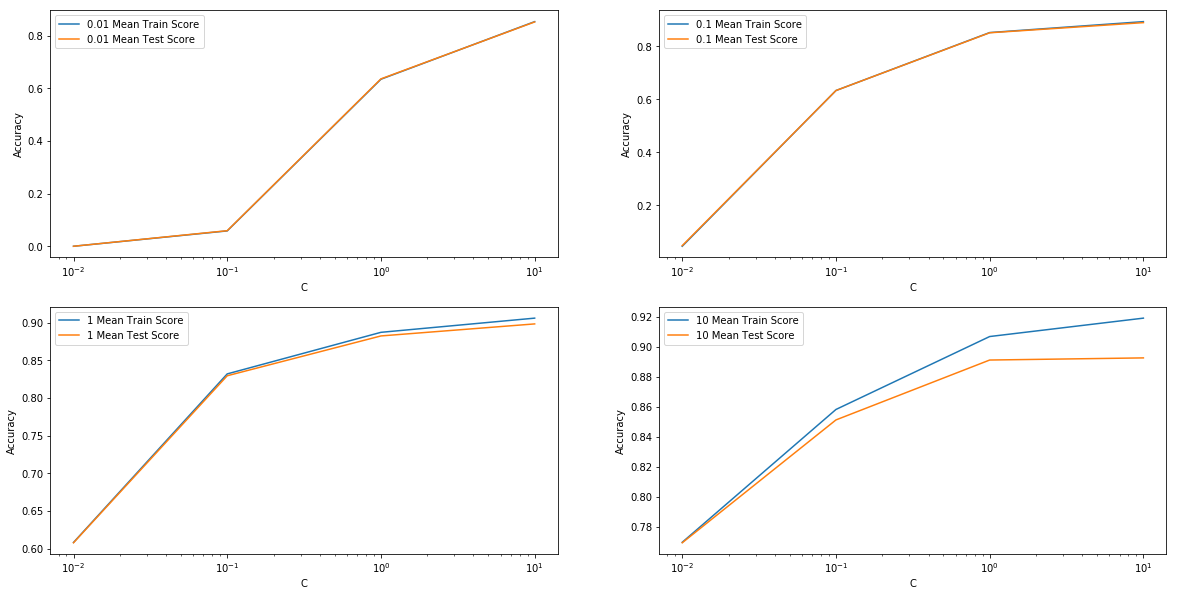

In [61]:
x_axis = param_grid['C']
l1_train = cv_results[cv_results['param_gamma']==0.01]['mean_train_score']
l1_test = cv_results[cv_results['param_gamma']==0.01]['mean_test_score']
l2_train = cv_results[cv_results['param_gamma']==0.1]['mean_train_score']
l2_test = cv_results[cv_results['param_gamma']==0.1]['mean_test_score']
l3_train = cv_results[cv_results['param_gamma']==1]['mean_train_score']
l3_test = cv_results[cv_results['param_gamma']==1]['mean_test_score']
l4_train = cv_results[cv_results['param_gamma']==10]['mean_train_score']
l4_test = cv_results[cv_results['param_gamma']==10]['mean_test_score']
%matplotlib inline

plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.plot(x_axis, l1_train , label = '0.01 Mean Train Score')
plt.plot(x_axis, l1_test , label = '0.01 Mean Test Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.xscale('log')

plt.subplot(2, 2, 2)
plt.plot(x_axis, l2_train , label = '0.1 Mean Train Score')
plt.plot(x_axis, l2_test , label = '0.1 Mean Test Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.xscale('log')

plt.subplot(2,2,3)
plt.plot(x_axis, l3_train , label = '1 Mean Train Score')
plt.plot(x_axis, l3_test , label = '1 Mean Test Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.xscale('log')

plt.subplot(2,2,4)
plt.plot(x_axis, l4_train , label = '10 Mean Train Score')
plt.plot(x_axis, l4_test , label = '10 Mean Test Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.xscale('log')

In [62]:
print("Best cross-validation score: {:.4f}".format(grid_svcRbf.best_score_))
print('Best parameters term:',grid_svcRbf.best_params_)
print("Training Score: {:.4f}".format(grid_svcRbf.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_svcRbf.score(X_test, y_test)))

Best cross-validation score: 0.8985
Best parameters term: {'C': 10, 'gamma': 1}
Training Score: 0.9062
Testing Score: 0.9056


In [63]:
y_svcRbf_predict_train = grid_svcRbf.predict(X_train)
y_svcRbf_predict = grid_svcRbf.predict(X_test)

In [72]:
report_table = report_table + [['Kernalized RBF SVC', 'C = 10, Gamma = 1', grid_svcRbf.score(X_train, y_train), grid_svcRbf.score(X_test, y_test), f1_score(y_svcRbf_predict_train, y_train), f1_score(y_svcRbf_predict, y_test)]]

In [73]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train F1 score', 'Test F1 score'])

In [74]:
report.index = report['Model name']

In [75]:
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train F1 score,Test F1 score
Model name,,,,,,
knn,knn,k = 10,0.904666,0.900358,0.904666,0.900358
Logistic,Logistic,"C = 10, penalty = l1",0.904869,0.912206,0.904869,0.912206
Decision Tree,Decision Tree,max_depth = 3,0.909137,0.900364,0.909137,0.900364
Linear SVC,Linear SVC,C = 10,0.906047,0.913105,0.906047,0.913105
Kernalized RBF SVC,Kernalized RBF SVC,"C = 10, Gamma = 1",0.906227,0.905579,0.906227,0.905579


From the above report we can see that the best model is linear SVC with the highest test F1 score of 0.913.